In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [114]:
unscaled_data = pd.read_csv("data/MultipleLR.csv" , names = ["x1" , "x2" , "x3","y"])
unscaled_data.head()

,x1,x2,x3,y
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [115]:
X_unscaled = unscaled_data[["x1" , "x2" , "x3"]].values
Y = unscaled_data["y"].values.reshape(-1 , 1)
X_unscaled.shape , Y.shape

((25, 3), (25, 1))

In [116]:
num_iterations = 1000
learning_rate = [0.0001 , 0.001 , 0.01 , 0.1 , 1]
m = len(Y)
X_b = np.c_[ np.ones( (m,1)) , X_unscaled]
costs = {}
grad_l2_norms = {}

for lr in learning_rate:
    theta  = np.zeros( (X_b.shape[1] , 1) )
    cost_history = []
    grad_l2_history = []
    print(f"training with learning rate: {lr}")

    for i in range(num_iterations):
        Y_pred = X_b.dot(theta)
        assert Y_pred.shape == Y.shape , "Y_pred:{Y_pred.shape} and Y:{Y.shape} shapes are not matching"

        error = Y_pred - Y
        cost = (1/(2*m)) * np.sum(error ** 2)

        if np.isnan(cost) or np.isinf(cost):
            break

        gradient = (1/m) * X_b.T.dot(error)
        theta = theta - lr * gradient
        gradient = np.linalg.norm(gradient)
        cost_history.append(cost)
        grad_l2_history.append( gradient )
    
        if gradient < 1e-4:
            break
    print(f"final cost after {i+1} iterations is {cost}")

    costs[lr] = cost_history
    grad_l2_norms[lr] = grad_l2_history


training with learning rate: 0.0001
final cost after 1000 iterations is 3.1401573921119077
training with learning rate: 0.001
final cost after 121 iterations is inf
training with learning rate: 0.01
final cost after 68 iterations is inf
training with learning rate: 0.1
final cost after 47 iterations is inf
training with learning rate: 1
final cost after 37 iterations is inf


d:\anaconda\envs\iti\Lib\site-packages\numpy\linalg\_linalg.py:2792: RuntimeWarning: overflow encountered in dot
  sqnorm = x.dot(x)
C:\Users\basil\AppData\Local\Temp\ipykernel_19952\1740064039.py:19: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum(error ** 2)
d:\anaconda\envs\iti\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(X_unscaled)
X_scaled = scaled.transform(X_unscaled)
X_b = np.c_[ np.ones( (m,1)) , X_scaled]
theta  = np.zeros( (X_b.shape[1] , 1) )
num_iterations = 1000
lr = [0.0001 , 0.001 , 0.01 , 0.1 , 1]
costs_scaled = {}
grad_l2_norms_scaled = {}
    

In [ ]:
for lr in learning_rate:
    theta = np.zeros( (X_b.shape[1] , 1) )
    cost_sclaed = []
    grad_l2_scaled = []
    print(f"training with learning rate: {lr}")

    for i in range(num_iterations):
        Y_pred = X_b.dot(theta)
        assert Y_pred.shape == Y.shape , "Y_pred:{Y_pred.shape} and Y:{Y.shape} shapes are not matching"

        error = Y_pred - Y
        cost = (1/(2*m)) * np.sum(error **2)
        if np.isnan(cost) or np.isinf(cost):
            break
        
        gradient = (1/m) * X_b.T.dot(error)
        theta = theta - lr * gradient
        gradient = np.linalg.norm(gradient)
        cost_sclaed.append(cost)
        grad_l2_scaled.append( gradient )

        if gradient < 1e-4:
            break
        
    print(f"final cost after {i+1} iteration is: {cost}")
    costs_scaled[lr] = cost_sclaed
    grad_l2_norms_scaled[lr] = grad_l2_scaled

training with learning rate: 0.0001
final cost after 1000 iteration is: 10912.951730571893
training with learning rate: 0.001
final cost after 1000 iteration is: 1784.7146995516375
training with learning rate: 0.01
final cost after 1000 iteration is: 3.118654219596225
training with learning rate: 0.1
final cost after 962 iteration is: 2.8689036305028077
training with learning rate: 1
final cost after 621 iteration is: inf


d:\anaconda\envs\iti\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


# Unscaled data:
## -The higher the lr is the more exploding it gets and tends to infinity because of the step that makes the model diverge
## -At lr = 0.0001 it was converging well since data is unscaled it needed lower lr so it doesnt explode and overshoot the step
-------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------
# Scaled data:
## -lr 0.0001 model didnt converge yet and need more training since line didnt flatten
## -lr 0.001 model was converging better than prev lr but wasnt good enough yet
## -lr 0.01 model stats to convering around 200 iterations
## -lr 0.1 model converged really fast
## -lr 1   lr was too big made model to diverge and cost function to go to inf
## KEY POINT ( model is sensetive to scale of data with respect to lr)

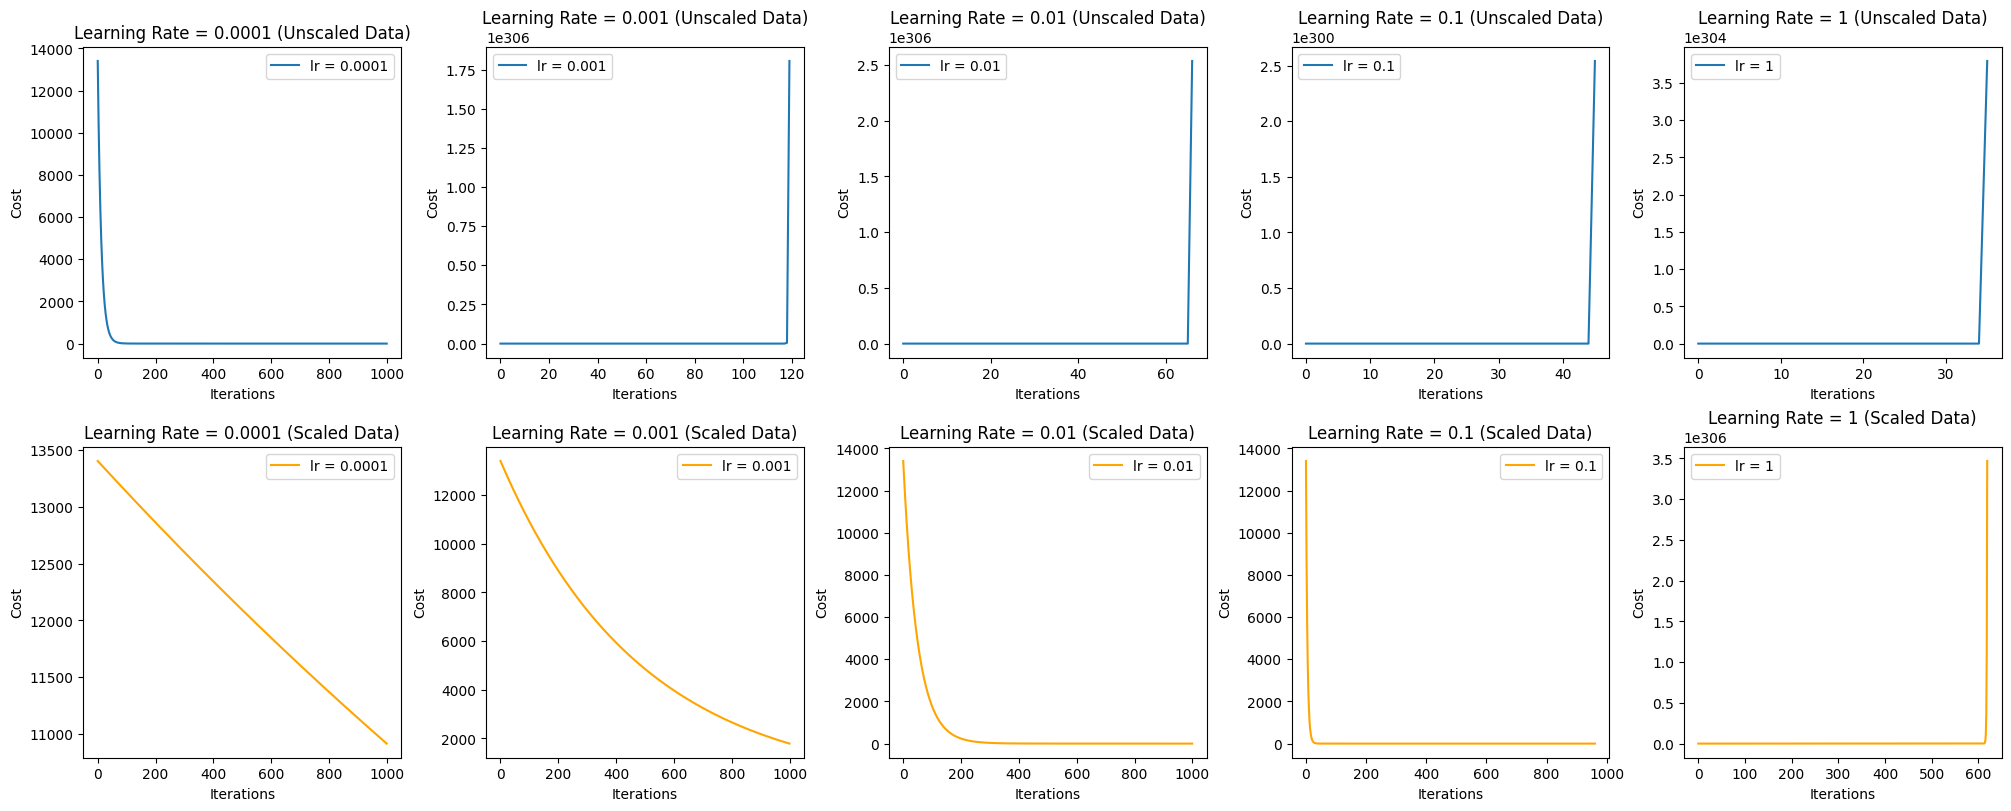

In [ ]:
fig , axis = plt.subplots(2,5, figsize = (20,8) , constrained_layout = True)
for i , lr in enumerate(learning_rate):
    axis[0 , i].plot( costs[lr] , label = f"lr = {lr}" )
    axis[0 , i].set_title(f"Learning Rate = {lr} (Unscaled Data)")
    axis[0 , i].set_xlabel("Iterations")
    axis[0 , i].set_ylabel("Cost")
    axis[0 , i].legend()

    axis[1 , i].plot( costs_scaled[lr] , label = f"lr = {lr}" , color = 'orange' )
    axis[1 , i].set_title(f"Learning Rate = {lr} (Scaled Data)")
    axis[1 , i].set_xlabel("Iterations")
    axis[1 , i].set_ylabel("Cost")
    axis[1 , i].legend()

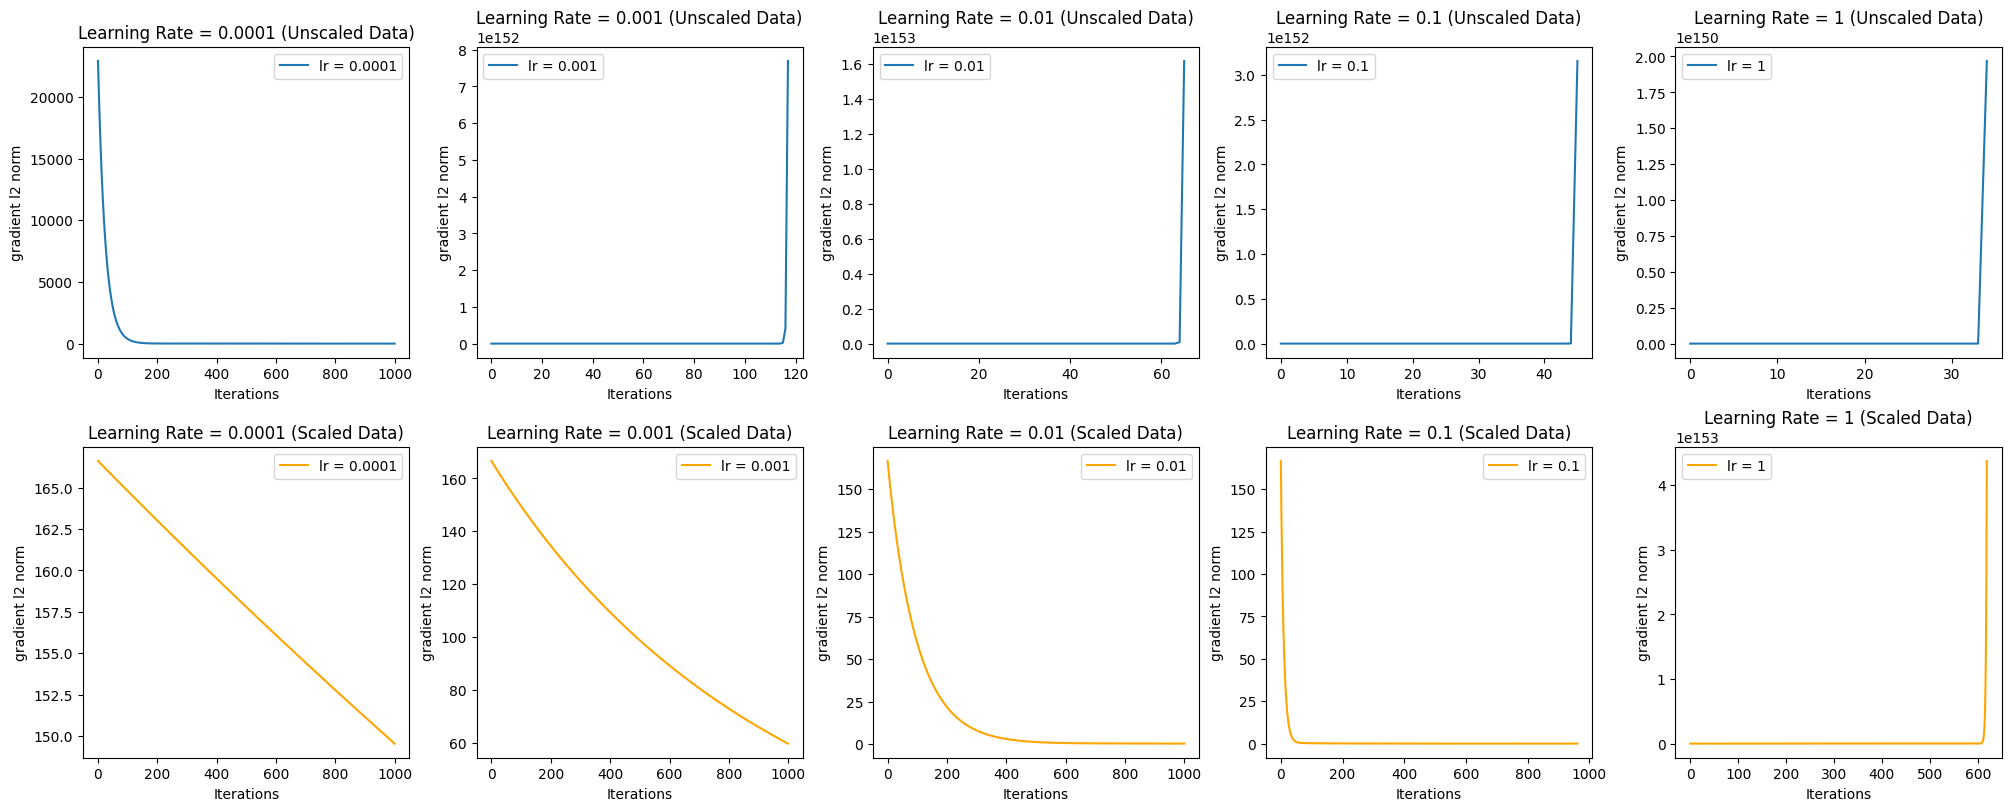

In [120]:
fig , axis = plt.subplots(2,5, figsize = (20,8) , constrained_layout = True)
for i , lr in enumerate(learning_rate):
    axis[0 , i].plot( grad_l2_norms[lr] , label = f"lr = {lr}" )
    axis[0 , i].set_title(f"Learning Rate = {lr} (Unscaled Data)")
    axis[0 , i].set_xlabel("Iterations")
    axis[0 , i].set_ylabel("gradient l2 norm")
    axis[0 , i].legend()

    axis[1 , i].plot( grad_l2_norms_scaled[lr] , label = f"lr = {lr}" , color = 'orange' )
    axis[1 , i].set_title(f"Learning Rate = {lr} (Scaled Data)")
    axis[1 , i].set_xlabel("Iterations")
    axis[1 , i].set_ylabel("gradient l2 norm")
    axis[1 , i].legend()